# Vizulation WDI dataset

In [1]:
# Import packages
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

Import the WDI dataset

In [2]:
df = pd.read_csv('WDIData.csv', sep=',') 
df = df.drop('Unnamed: 66', axis=1)

selected_indicators = ['GDP growth (annual %)',
                       'Individuals using the Internet (% of population)',
                       'Foreign direct investment, net inflows (BoP, current US$)',
                       'GNI per capita, PPP (current international $)']

df = df[df['Indicator Name'].isin(selected_indicators)]

df.head(2)
df.tail(2)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
382633,Zimbabwe,ZWE,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2340.0,2520.0,2570.00000,2630.000000,2750.000000,2370.0,2510.0,2360.0,2180.0,2380.0
382747,Zimbabwe,ZWE,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,15.5,16.36474,22.742818,23.119989,24.4,25.0,25.1,29.3,NaN


For effective data analysis we need the data in the wide format but with the variable names in the columns

In [3]:
df_long = df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                  var_name='Year', value_name='Value')

df_wide = df_long.pivot_table(index=['Year', 'Country Name', 'Country Code'], 
                              columns='Indicator Name', values='Value', aggfunc='first')

df_wide = df_wide.reset_index()
df_wide['Year'] = df_wide['Year'].astype(int)
df_wide

Indicator Name,Year,Country Name,Country Code,"Foreign direct investment, net inflows (BoP, current US$)",GDP growth (annual %),"GNI per capita, PPP (current international $)",Individuals using the Internet (% of population)
0,1960,Botswana,BWA,NaN,NaN,NaN,0.0
1,1960,Burundi,BDI,NaN,NaN,NaN,0.0
2,1960,Grenada,GRD,NaN,NaN,NaN,0.0
3,1960,Maldives,MDV,NaN,NaN,NaN,0.0
4,1960,Syrian Arab Republic,SYR,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...
13601,2021,West Bank and Gaza,PSE,NaN,7.050451,7370.0,NaN
13602,2021,"Yemen, Rep.",YEM,NaN,-2.061513,NaN,NaN
13603,2021,Serbia,SRB,NaN,7.389271,20610.0,NaN
13604,2021,Montenegro,MNE,NaN,12.434359,23280.0,NaN


Check NA values

<Axes: xlabel='Indicator Name'>

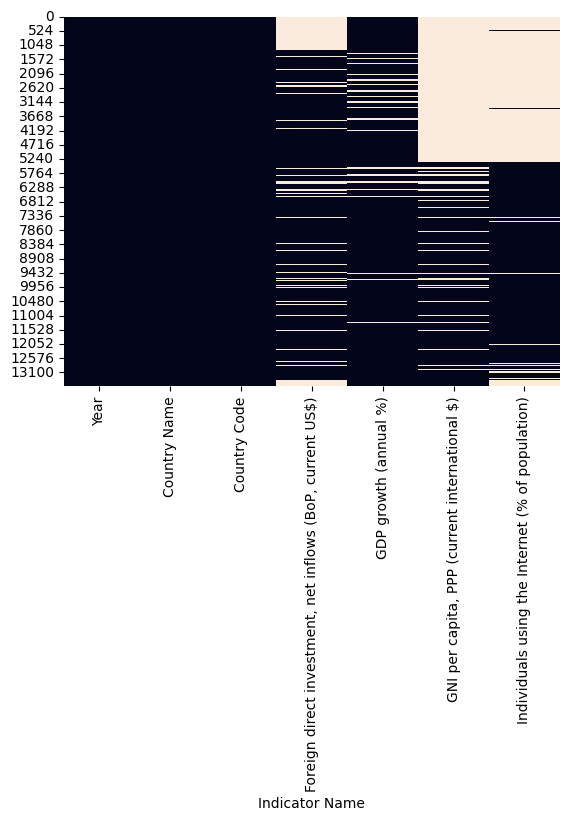

In [4]:
sns.heatmap(df_wide.isnull(), cbar=False)

## Plot data

Testing plot

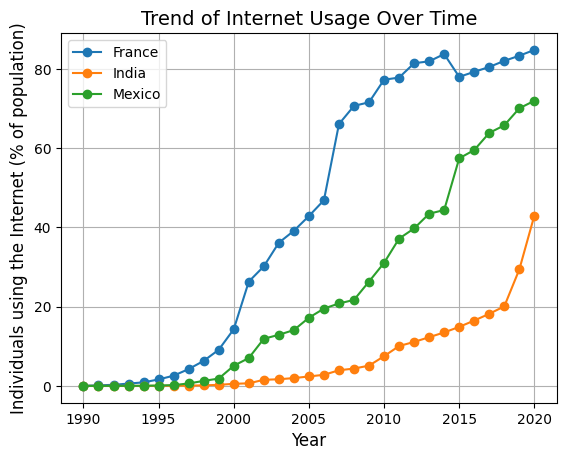

In [5]:
df = df_wide
country_groups = ["France",
                  "India",
                  "Mexico"]

df_groups = df[df['Country Name'].isin(country_groups)]

for group in country_groups:
    group_data = df_groups[df_groups['Country Name'] == group]
    plt.plot(group_data['Year'], group_data['Individuals using the Internet (% of population)'], marker='o', linestyle='-', label=group)

plt.title('Trend of Internet Usage Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Individuals using the Internet (% of population)', fontsize=12)
# locs, labels = plt.xticks() 
# plt.xticks(locs[::5], df_groups['Year'].unique()[::5])
plt.legend()
plt.grid(True)
plt.show()


There is a strong relation between GNI and internet usage

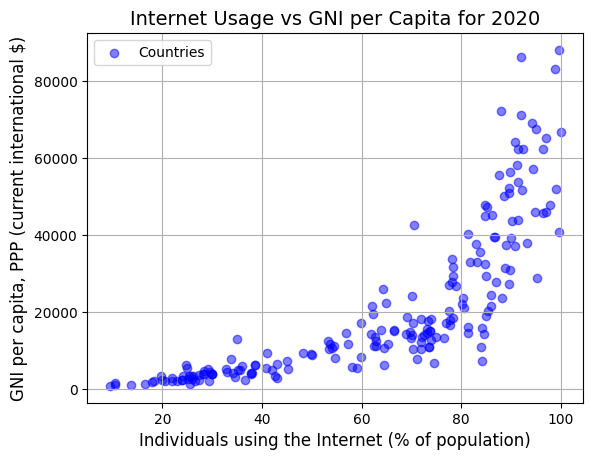

In [10]:
df_2020 = df_wide[df_wide['Year'] == 2020]

plt.scatter(df_2020['Individuals using the Internet (% of population)'], 
            df_2020['GNI per capita, PPP (current international $)'],
            alpha=0.5,
            color='blue')
plt.title('Internet Usage vs GNI per Capita for 2020', fontsize=14)
plt.xlabel('Individuals using the Internet (% of population)', fontsize=12)
plt.ylabel('GNI per capita, PPP (current international $)', fontsize=12)
plt.legend(['Countries'], loc='upper left')
plt.grid(True)
plt.show()


In [12]:
df_animate = df_wide

country_groups = ["Australia", "Belgium", "Canada", "Denmark", "Ecuador", 
                 "Fiji", "Greece", "Hungary", "Ireland", "Japan", 
                 "Kazakhstan", "Luxembourg", "Nepal", "Oman", "Peru", 
                 "Qatar", "Russia", "Singapore", "Turkey", "Uruguay", 
                 "Venezuela", "Wales", "Yemen", "Zimbabwe"]
df_animate = df_animate[df_animate['Country Name'].isin(country_groups)]

df_animate = df_animate[['Year',
                         'Country Name',
                         'Individuals using the Internet (% of population)',
                         'GNI per capita, PPP (current international $)']]

start_year = 1990
end_year = 2020
df_animate = df_animate[(df_animate['Year'] >= start_year) & (df_animate['Year'] <= end_year)]

df_animate = df_animate.dropna(axis=0)

fig = px.scatter(df_animate, x='Individuals using the Internet (% of population)', 
                 y='GNI per capita, PPP (current international $)',
                 animation_frame="Year",
                 animation_group="Country Name",
                 size='GNI per capita, PPP (current international $)',
                 color="Country Name",
                 title="Internet Access vs GNI per Country",
                 hover_name="Country Name",
                 range_y=[df_animate['GNI per capita, PPP (current international $)'].min(),df_animate['GNI per capita, PPP (current international $)'].max()]) 

fig.update_xaxes(range=[0, 100])

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            showactive=False,
            buttons=[
                dict(
                    label="Play",
                    method="animate",
                    args=[None, {"frame": {"duration": 500, "redraw": True}}],
                ),
                dict(
                    label="Pause",
                    method="animate",
                    args=[[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate"}],
                ),
            ],
        )
    ]
)
fig.show()
